In [21]:
# The linear regression implementation uses a tutorial by Mirko Stojiljković (https://realpython.com/linear-regression-in-python/)

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

csv = pd.read_csv('auto-mpg-edit.csv')

horse = np.array(csv['horsepower']).reshape((-1, 1))
mpg = np.array(csv['mpg'])

lr = LinearRegression().fit(horse, mpg)

slope = lr.coef_
intercept = lr.intercept_

print(f"Intercept: {lr.intercept_}")
print(f"Slope: {lr.coef_}")

#predicting mpg for a 98 horsepower.
print(f"90 horsepower =~ {lr.predict([[98]])} mpg")

#obtaining confidence and prediction. reference: https://github.com/xbeat/Machine-Learning/blob/main/Confidence%20and%20Prediction%20Intervals%20with%20Python.md

mpg_pred = lr.predict(horse)
mse = mean_squared_error(mpg, mpg_pred)
std_error = np.sqrt(mse)
z = stats.norm.ppf(0.95)
pi = np.column_stack((mpg_pred - z * std_error, mpg_pred + z * std_error))

t = stats.ttest_ind(csv['horsepower'], mpg)
confidence = t.confidence_interval(confidence_level=0.95)


Intercept: 40.042179128052474
Slope: [-0.15868161]
90 horsepower =~ [24.49138175] mpg


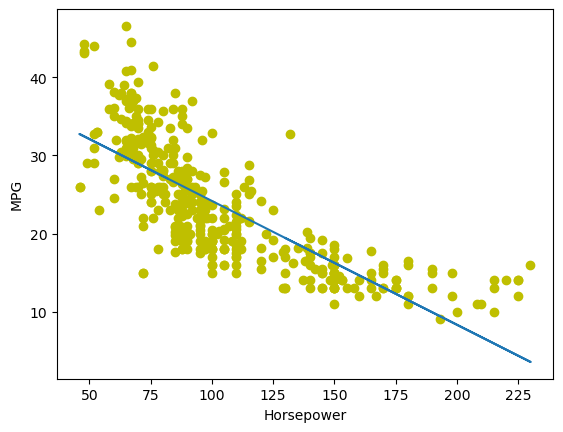

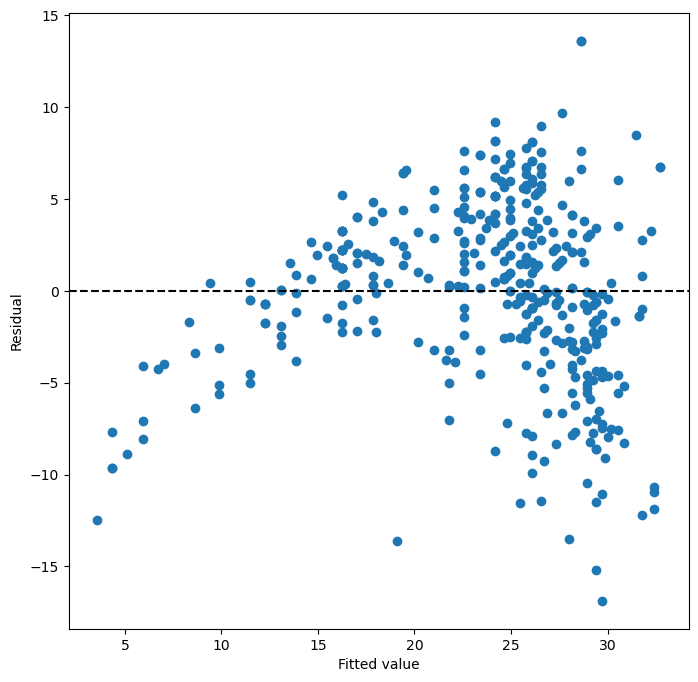

In [22]:
plt.plot(horse,mpg, 'yo')
plt.plot(horse, slope*horse+intercept) 
plt.xlabel("Horsepower")
plt.ylabel("MPG")


# diagnostic plot: residual-fitted. Repurposes code from the textbook (pg. 122)
ax = plt.subplots(figsize=(8,8))[1]

fitted_values = lr.predict(horse)
residuals = fitted_values - mpg

ax.scatter(fitted_values, residuals)
ax.set_xlabel('Fitted value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');
